In [2]:
%matplotlib inline
import pymc3 as pm
import numpy as np
from matplotlib import animation

import matplotlib.pyplot as plt

/Users/twiecki/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# To support javascript plotting, execute this cell and not the one below.
# Note that animations get very large this way.
from JSAnimation import IPython_display

In [5]:
# If you want to create a video and embed that run this cell instead.
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
            video = open(f.name, "rb").read()
        with NamedTemporaryFile(suffix='.avi') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)



from IPython.display import HTML



def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

animation.Animation._repr_html_ = anim_to_html

In [6]:
# Generate some data
np.random.seed(124)
size = 50
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
y = true_intercept + x*true_slope + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

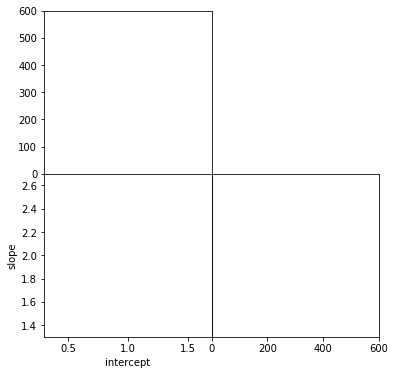

In [7]:
# Quickly hacked plotting code
samples = 600
figsize(6, 6)
fig = plt.figure()
i_width = (true_intercept-.7, true_intercept+.7)
s_width = (true_slope-.7, true_slope+.7)
samples_width = (0, samples)
ax1 = fig.add_subplot(221, xlim=i_width, ylim=samples_width)
ax2 = fig.add_subplot(224, xlim=samples_width, ylim=s_width)
ax3 = fig.add_subplot(223, xlim=i_width, ylim=s_width,
                      xlabel='intercept',
                      ylabel='slope')
fig.subplots_adjust(wspace=0.0, hspace=0.0)
line1, = ax1.plot([], [], lw=1)
line2, = ax2.plot([], [], lw=1)
line3, = ax3.plot([], [], 'o', lw=2, alpha=.1)
line4, = ax3.plot([], [], lw=1, alpha=.3)
line5, = ax3.plot([], [], 'k', lw=1)
line6, = ax3.plot([], [], 'k', lw=1)
ax1.set_xticklabels([])
ax2.set_yticklabels([])
#path = plt.scatter([], [])
lines = [line1, line2, line3, line4, line5, line6]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    with model:
        if i == samples * .75:
            for j in range(500): iter_sample.next() 
        trace = iter_sample.next()
    line1.set_data(trace['Intercept'][::-1], range(len(trace['Intercept'])))
    line2.set_data(range(len(trace['x'])), trace['x'][::-1])
    line3.set_data(trace['Intercept'], trace['x'])
    line4.set_data(trace['Intercept'], trace['x'])
    intercept = trace['Intercept'][-1]
    x = trace['x'][-1]
    line5.set_data([intercept, intercept], [x, s_width[1]])
    line6.set_data([intercept, i_width[1]], [x, x])
    return lines

In [16]:
iter_sample

<generator object iter_sample at 0x1c1e20eaf0>

In [9]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', data)
    step = pm.Metropolis()
    iter_sample = pm.iter_sample(samples+1000, step)

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=samples, interval=5, blit=True)

INFO (theano.gof.compilelock): Waiting for existing lock by process '39745' (I am process '81212')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/twiecki/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir


AttributeError: 'generator' object has no attribute 'next'

In [10]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', data)
    step = pm.Slice()
    iter_sample = pm.iter_sample(samples+1000, step)

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=samples, interval=5, blit=True)

AttributeError: 'generator' object has no attribute 'next'

In [11]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', data)
    step = pm.NUTS()
    iter_sample = pm.iter_sample(samples+1000, step)

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=samples, interval=5, blit=True)

AttributeError: 'generator' object has no attribute 'next'